# Plotting the vectors using PCA

### 1. Importing packages

In [1]:
!pip install ipynb

In [2]:
import numpy as np
import nltk
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt

from ipynb.fs.defs.capitals import get_word_embeddings

### 2. Loading Google News embeddings

In [3]:
embeddings = KeyedVectors.load_word2vec_format('./src/GoogleNews-vectors-negative300.bin', binary = True)

In [7]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town','village', 'country', 'continent', 'petroleum', 'joyful']
word_embeddings = get_word_embeddings(embeddings,words)

### 3. Computing PCA

**Defining PCA computation function**

**Inputs** :  
*X*: of dimension (m,n) where each row corresponds to a word vector  
*n_components*: Number of components we want to keep

**Outputs** :  
*X_reduced*: data transformed in 2 dims/columns + regenerated original data

In [5]:
def compute_pca(X, n_components=2):

    X_demeaned = X-np.mean(X,axis=0)

    covariance_matrix = np.cov(X_demeaned,rowvar=False)

    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    idx_sorted = np.argsort(eigen_vals)
    idx_sorted_decreasing = idx_sorted[::-1]


    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]

    X_reduced = (np.dot(eigen_vecs_subset.T, X_demeaned.T)).T

    return X_reduced

### 4. Plotting the vectors

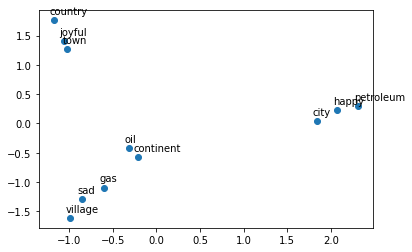

In [8]:
X = np.array(list(word_embeddings.values()))
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()